In [1]:
""" Read the soil solution concentrations (umol/L) from 
Hubbard Brook watershed 1 """
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from shared_read_HBR import *

Text(0, 0.5, 'g/m3 soil pore water')

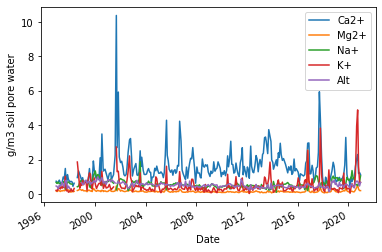

In [2]:
data = read_lysimeter()
data.drop('pH', axis = 1).plot()
plt.ylabel('g/m3 soil pore water')

In [3]:
data = pd.read_excel(os.path.join(os.environ['PROJDIR'], 'DATA', 'Weathering', 
                                  'Hubbard Brook', 'knb-lter-hbr.158.1',
                                  'w1ffexchem.xlsx'),
                     index_col = [3, 1, 2])

# 'Min', 'cor', 'min' probably all means mineral soil of top 10cm
new_index_level_0 = [t if t in ['Oa', 'Oie'] else 'Min' for t in data.index.get_level_values(0)]
data.index = pd.MultiIndex.from_arrays([new_index_level_0, data.index.get_level_values(1),
                                        data.index.get_level_values(2)], 
                                        names = ['Horizon','Year','Plot'])

data = data[['ExAcidcmolc_kg','ExCacmolc_kg', 'ExMgcmolc_kg', 
             'ExNacmolc_kg', 'ExKcmolc_kg', 'ExAlcmolc_kg']].sort_index()
data[data < 0] = np.nan

data

ExAcidcmolc_kg  ExCacmolc_kg  ExMgcmolc_kg  ExNacmolc_kg  \
Horizon Year Plot                                                              
Min     1998 3.0              7.45          0.11          0.13          0.10   
             4.0             15.48          0.46          0.34          0.23   
             7.0             14.08          0.24          0.46          0.16   
             10.0             6.38          0.18          0.17          0.07   
             12.0            12.94          0.88          0.42          0.18   
...                            ...           ...           ...           ...   
Oie     2010 192.0            5.42         39.84          3.93          0.03   
             194.0            8.49         27.30          4.66          0.11   
             196.0            4.55         19.52          3.09          0.03   
             197.0            3.84          4.12          1.01          0.25   
             199.0            5.49          6.02          1.42          0.06   

                    ExKcmolc_kg  ExAlcmolc_kg  
Horizon Year Plot                              
Min     1998 3.0           0.17          3.53  
             4.0           0.49         16.05  
             7.0           0.53          8.74  
             10.0          0.24          4.54  
             12.0          0.45          9.59  
...                         ...           ...  
Oie     2010 192.0         1.70           NaN  
             194.0         2.61           NaN  
             196.0         1.54           NaN  
             197.0         0.56           NaN  
             199.0         0.94           NaN  

[1661 rows x 6 columns]

<Figure size 576x432 with 0 Axes>

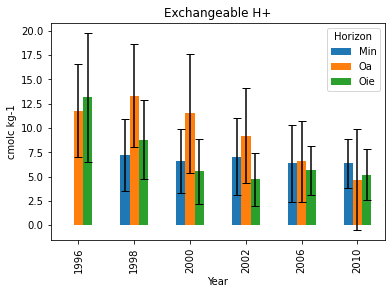

<Figure size 576x432 with 0 Axes>

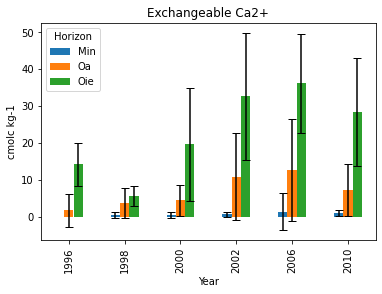

<Figure size 576x432 with 0 Axes>

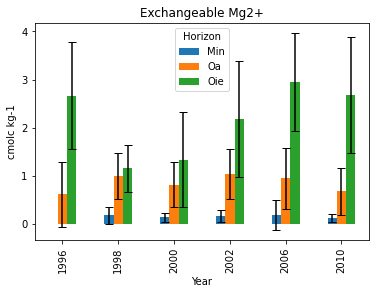

<Figure size 576x432 with 0 Axes>

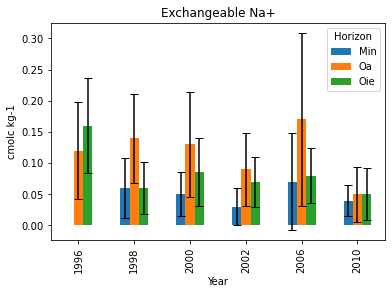

<Figure size 576x432 with 0 Axes>

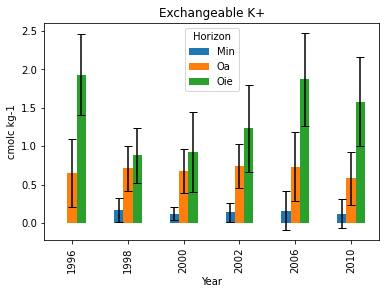

<Figure size 576x432 with 0 Axes>

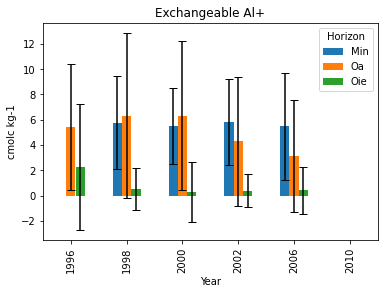

In [9]:
for cation in data.columns:
    data_mean = data[cation].groupby(['Year', 'Horizon']).median().unstack()
    data_std = data[cation].groupby(['Year', 'Horizon']).std().unstack()

    plt.figure(figsize = (8,6))
    data_mean.plot(kind='bar', yerr=data_std, capsize=4)

    cation = cation.replace('cmolc_kg','').replace('Ex','')
    if cation == 'Acid':
        cation = 'H+'
    elif cation in ['Ca','Mg']:
        cation = cation + '2+'
    else:
        cation = cation + '+'
    plt.title(f'Exchangeable {cation}')
    plt.ylabel('cmolc kg-1')
    plt.savefig(f'./temp/hbr_soil_{cation}.png', dpi = 600, bbox_inches = 'tight')

In [5]:
data[cation]

KeyError: 'Exchangeable Al'

In [5]:
data[cation]

Horizon  Year  Plot 
Min      1998  3.0       3.53
               4.0      16.05
               7.0       8.74
               10.0      4.54
               12.0      9.59
                        ...  
Oie      2010  192.0      NaN
               194.0      NaN
               196.0      NaN
               197.0      NaN
               199.0      NaN
Name: ExAlcmolc_kg, Length: 1661, dtype: float64